<a href="https://colab.research.google.com/github/silviazandoli/explanaible_ai/blob/master/6_taxi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from lightgbm import LGBMRegressor #A
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

Chapter 4 - Model Agnostic Methods-SHAP

gianfagna_l_di_cecco_a_explainable_ai_with_python (Book)

In [4]:
#download dataset here
#https://www.kaggle.com/datasets/dansbecker/new-york-city-taxi-fare-prediction
#Data preprocessing.
data = pd.read_csv("train.csv", nrows=50000)

In [5]:
# we filters outliers and train a gradient boosting model
data = data.query('pickup_latitude > 40.7 and pickup_latitude <40.8 and ' +
'dropoff_latitude > 40.7 and dropoff_latitude < 40.8 and ' +
'pickup_longitude > -74 and pickup_longitude < -73.9 and ' +
'dropoff_longitude > -74 and dropoff_longitude < -73.9 and '
+
'fare_amount > 0'
)
base_features = ['pickup_longitude',
'pickup_latitude',
'dropoff_longitude',
'dropoff_latitude',
'passenger_count']
X = data[base_features]
y=data['fare_amount']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.5, random_state=1111)
# Tain with LGBM Regressor
reg = LGBMRegressor( importance_type='split',random_state=42,num_leaves=120) #B
reg.fit(X_train, y_train)
print(r2_score(y_train,reg.predict(X_train)))
print(r2_score(y_test,reg.predict(X_test)))
#A We will train a LGBM Regressor. Note that LGBM is a tree-based model.
#B Here we train the LGBM Regressor

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000432 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1027
[LightGBM] [Info] Number of data points in the train set: 15644, number of used features: 5
[LightGBM] [Info] Start training from score 8.457990
0.6872889587581943
0.4777749929850299


In [6]:
!pip install eli5

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 216.2/216.2 kB 3.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for eli5: filename=eli5-0.13.0-py2.py3-none-any.whl size=107719 sha256=626d2181aec6911129dc38beebe82f0c134b8774cd668748f25c253b62025f40
  Stored in directory: /root/.cache/pip/wheels/b8/58/ef/2cf4c306898c2338d51540e0922c8e0d6028e07007085c0004
Successfully built eli5


In [7]:
import eli5 #A
from eli5.sklearn import PermutationImportance

In [8]:
# Getting permutation importance.
'''result = permutation_importance(reg, X_test, y_test, n_repeats=10,random_state=42)
perm_sorted_idx = result.importances_mean.argsort()
# Visualize two variable importance plots.
fig, ax1= plt.subplots(1, 1, figsize=(12, 5))'''
perm = PermutationImportance(reg, random_state=1).fit(X_test, y_test) #B
eli5.show_weights(perm, feature_names = X_test.columns.tolist())

drop of latitude the most important feature

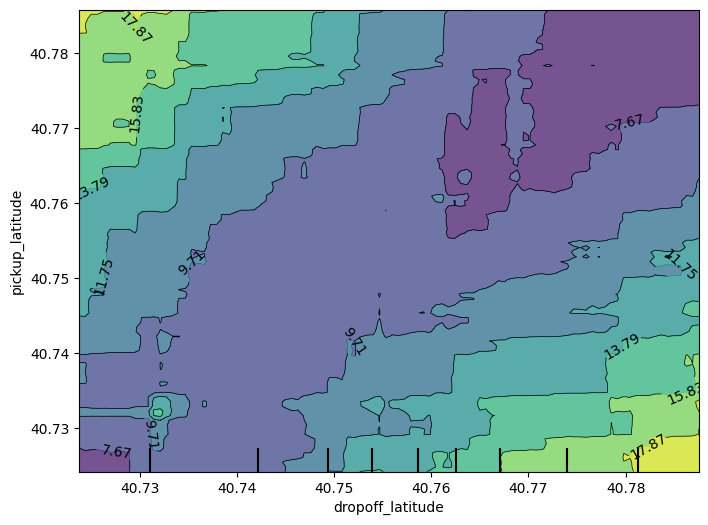

In [9]:
'''print('Computing partial dependence plots...')
from sklearn.inspection import plot_partial_dependence
import time
tic = time.time()
fig, ax = plt.subplots(figsize=(5, 5))
plot_partial_dependence(reg, X_test, [(X_test.columns[0],X_test.columns[3])],
n_jobs=3, grid_resolution=20,ax=ax)
print("done in {:.3f}s".format(time.time() - tic))
ax.set_title('Partial dependence of NY taxi fare data - 2D')
plt.show()'''

#plot for the two most important features

from matplotlib import pyplot as plt
from sklearn.inspection import PartialDependenceDisplay

fig, ax = plt.subplots(figsize=(8, 6))
f_names = [('dropoff_latitude', 'pickup_latitude')]
# Similar to previous PDP plot except we use tuple of features instead of single feature
disp4 = PartialDependenceDisplay.from_estimator(reg, X_test, f_names, ax=ax)
plt.show()

In [11]:
!pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 547.9/547.9 kB 7.1 MB/s eta 0:00:00


In [12]:
import shap
#tic = time.time()
background=shap.kmeans(X_train, 10) #A
explainer = shap.KernelExplainer(reg.predict, background) #B
shap_values = explainer.shap_values(X_test, nsamples=20)
#print("done in {:.3f}s".format(time.time() - tic))

#A We need background information. For speed we’ll summarize the background as K = 10 samples
#B Using KernelSHAP

Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning


  0%|          | 0/15645 [00:00<?, ?it/s]

Output streaming troncato alle ultime 5000 righe.
Usage of np.ndarray subset (sliced data) is not recommended due to it will double the peak memory cost in LightGBM.
Usage of np.ndarray subset (sliced data) is not recommended due to it will double the peak memory cost in LightGBM.
Usage of np.ndarray subset (sliced data) is not recommended due to it will double the peak memory cost in LightGBM.
Usage of np.ndarray subset (sliced data) is not recommended due to it will double the peak memory cost in LightGBM.
Usage of np.ndarray subset (sliced data) is not recommended due to it will double the peak memory cost in LightGBM.
Usage of np.ndarray subset (sliced data) is not recommended due to it will double the peak memory cost in LightGBM.
Usage of np.ndarray subset (sliced data) is not recommended due to it will double the peak memory cost in LightGBM.
Usage of np.ndarray subset (sliced data) is not recommended due to it will double the peak memory cost in LightGBM.
Usage of np.ndarray su

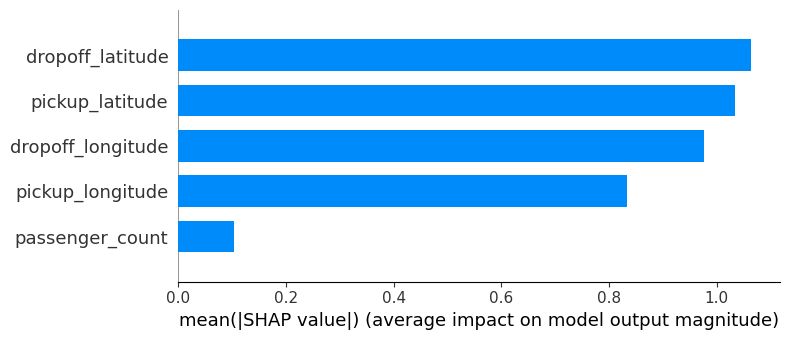

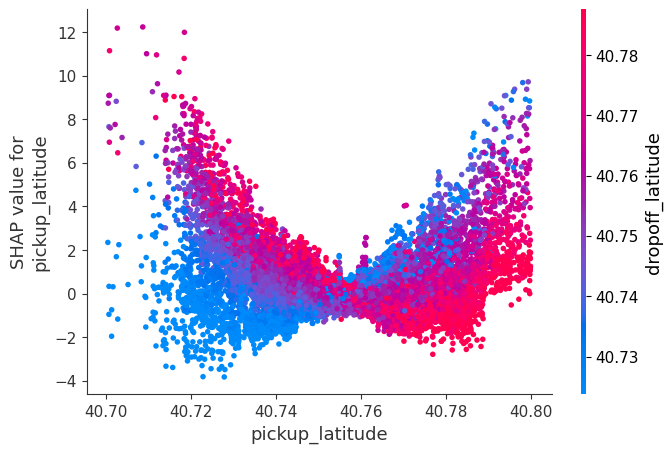

In [13]:
# Variable importance-like plot.
shap.summary_plot(shap_values, X_test, plot_type="bar")
shap.dependence_plot("pickup_latitude", shap_values, X_test) #A
#A Let’s make a PDP-like plot with SHAP

TreeShap for shortening the time to provide explaination

In [15]:
import shap
print('Computing SHAP...')
#tic = time.time()
explainer = shap.TreeExplainer(reg) #A
shap_values = explainer.shap_values(X_test)
#print("done in {:.3f}s".format(time.time() - tic))
pd.DataFrame(shap_values,columns=X_test.columns)
#A Using TreeSHAP, not KernelSHAP. Remember reg is a LGBM model that is a tree-based model.

Computing SHAP...


pickup_longitude  pickup_latitude  dropoff_longitude  dropoff_latitude  \
0             -1.274566        -0.691413          -0.723831         -0.796625   
1             -0.882233         0.247185           0.083601         -0.461245   
2              1.528628         1.378214           1.452674          1.127799   
3              0.579483         0.440030           0.103185          0.343288   
4             -0.176415        -0.746616          -0.631772         -0.907211   
...                 ...              ...                ...               ...   
15640         -0.699298        -1.173926          -1.016311         -0.441306   
15641         -0.376068        -1.690801          -0.469174         -0.921635   
15642          0.290428         0.105471          -0.501527          0.197691   
15643         -0.940637         0.293894          -0.145362          2.124083   
15644         -0.901060        -0.675596          -0.472347         -0.836372   

       passenger_count  
0            -0.013823  
1            -0.003345  
2            -0.129735  
3             0.071082  
4            -0.027385  
...                ...  
15640         0.029314  
15641        -0.036162  
15642         0.372988  
15643        -0.037079  
15644        -0.026759  

[15645 rows x 5 columns]

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(_df_0, *['pickup_longitude'], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(_df_1, *['pickup_latitude'], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(_df_2, *['dropoff_longitude'], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(_df_3, *['dropoff_latitude'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(_df_4, *['pickup_longitude'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(_df_5, *['pickup_latitude'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(_df_6, *['dropoff_longitude'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(_df_7, *['dropoff_latitude'], **{})
chart

import numpy as np
from google.colab import autoviz

def scatter_plots(df, colname_pairs, figscale=1, alpha=.8):
  from matplotlib import pyplot as plt
  plt.figure(figsize=(len(colname_pairs) * 6 * figscale, 6 * figscale))
  for plot_i, (x_colname, y_colname) in enumerate(colname_pairs, start=1):
    ax = plt.subplot(1, len(colname_pairs), plot_i)
    df.plot(kind='scatter', x=x_colname, y=y_colname, s=(32 * figscale), alpha=alpha, ax=ax)
    ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = scatter_plots(_df_8, *[[['pickup_longitude', 'pickup_latitude'], ['pickup_latitude', 'dropoff_longitude'], ['dropoff_longitude', 'dropoff_latitude'], ['dropoff_latitude', 'passenger_count']]], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(_df_9, *['pickup_longitude'], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(_df_10, *['pickup_latitude'], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(_df_11, *['dropoff_longitude'], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(_df_12, *['dropoff_latitude'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(_df_13, *['pickup_longitude'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(_df_14, *['pickup_latitude'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(_df_15, *['dropoff_longitude'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(_df_16, *['dropoff_latitude'], **{})
chart

import numpy as np
from google.colab import autoviz

def scatter_plots(df, colname_pairs, figscale=1, alpha=.8):
  from matplotlib import pyplot as plt
  plt.figure(figsize=(len(colname_pairs) * 6 * figscale, 6 * figscale))
  for plot_i, (x_colname, y_colname) in enumerate(colname_pairs, start=1):
    ax = plt.subplot(1, len(colname_pairs), plot_i)
    df.plot(kind='scatter', x=x_colname, y=y_colname, s=(32 * figscale), alpha=alpha, ax=ax)
    ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = scatter_plots(_df_17, *[[['pickup_longitude', 'pickup_latitude'], ['pickup_latitude', 'dropoff_longitude'], ['dropoff_longitude', 'dropoff_latitude'], ['dropoff_latitude', 'passenger_count']]], **{})
chart

Error: Runtime no longer has a reference to this dataframe, please re-run this cell and try again.
Error: Runtime no longer has a reference to this dataframe, please re-run this cell and try again.
Error: Runtime no longer has a reference to this dataframe, please re-run this cell and try again.
Error: Runtime no longer has a reference to this dataframe, please re-run this cell and try again.


In [18]:
shap.initjs() # print the JS visualization code to the notebook
# visualize the a prediction's explanation, decomposition between average vs. row specific prediction.
shap.force_plot(explainer.expected_value, shap_values[50,:],X_test.iloc[50,:])

In [21]:
# Pretty visualization of the SHAP values per data row. We limit to the first 5000 samples
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[0:5000,:], X_test)